## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
raw_csv_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
df_comp['market_value']=df_comp.ftse
df_comp

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01,3445.980000
1994-01-10,475.270000,2225.00,3440.580000,18443.44,3440.580000
1994-01-11,474.130000,2228.10,3413.770000,18485.25,3413.770000
1994-01-12,474.170000,2182.06,3372.020000,18793.88,3372.020000
1994-01-13,472.470000,2142.37,3360.010000,18577.26,3360.010000
...,...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15,7731.827774
2018-01-24,2837.544008,13414.74,7643.428966,23940.78,7643.428966
2018-01-25,2839.253031,13298.36,7615.839954,23669.49,7615.839954


In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]
df['returns'] = df.market_value.pct_change(1)*100
df['price']=df_comp.market_value

<ipython-input-5-f5f5f5bcfdda>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1)*100
<ipython-input-5-f5f5f5bcfdda>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price']=df_comp.market_value


In [6]:
df.head()

,market_value,returns,price
date,,,
1994-01-07,3445.98,NaN,3445.98
1994-01-10,3440.58,-0.156704,3440.58
1994-01-11,3413.77,-0.779229,3413.77
1994-01-12,3372.02,-1.222988,3372.02
1994-01-13,3360.01,-0.356166,3360.01


In [7]:
import warnings
warnings.filterwarnings("ignore")

## The LLR Test

In [8]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [9]:
model_ar_6_ma_6 = ARMA(df.market_value, order=(6,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit(start_ar_lags = 11)
results_ar_6_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 6)   Log Likelihood              -27587.932
Method:                       css-mle   S.D. of innovations             58.849
Date:                Thu, 19 May 2022   AIC                          55203.864
Time:                        10:19:19   BIC                          55295.164
Sample:                    01-07-1994   HQIC                         55235.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6492    568.874      8.947      0.000    3974.676    6204.622
ar.L1.market_value     1.9277      0.032     60.147      0.000       1.865       1.991
ar.L2.market_value    -1.7360      0.040    -43.511      0.000      -1.814      -1.658
ar.L3.market_value     1.2675      0.034     36.838      0.000       1.200       1.335
ar.L4.market_value    -0.2372      0.160     -1.482      0.138      -0.551       0.077
ar.L5.market_value    -0.4066      0.167     -2.433      0.015      -0.734      -0.079
ar.L6.market_value     0.1842      0.049      3.782      0.000       0.089       0.280
ma.L1.market_value    -0.9488      0.035    -27.128      0.000      -1.017      -0.880
ma.L2.market_value     0.7798      0.032     24.184      0.000       0.717       0.843
ma.L3.market_value    -0.5084      0.031    -16.350      0.000      -0.569      -0.447
ma.L4.market_value    -0.1563      0.161     -0.972      0.331      -0.471       0.159
ma.L5.market_value     0.0954      0.057      1.687      0.092      -0.015       0.206
ma.L6.market_value     0.0670      0.024      2.782      0.005       0.020       0.114
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0857           -1.0502j            1.0537           -0.2370
AR.2            0.0857           +1.0502j            1.0537            0.2370
AR.3           -2.0248           -0.0000j            2.0248           -0.5000
AR.4            1.0011           -0.0000j            1.0011           -0.0000
AR.5            1.5300           -0.2675j            1.5532           -0.0275
AR.6            1.5300           +0.2675j            1.5532            0.0275
MA.1            0.1028           -1.0612j            1.0662           -0.2346
MA.2            0.1028           +1.0612j            1.0662            0.2346
MA.3            1.3620           -0.2797j            1.3904           -0.0322
MA.4            1.3620           +0.2797j            1.3904            0.0322
MA.5           -2.1767           -1.4329j            2.6060           -0.4073
MA.6           -2.1767           +1.4329j            2.6060            0.4073
-----------------------------------------------------------------------------
"""

In [10]:
model_ar_5_ma_6 = ARMA(df.market_value, order=(5,6))
results_ar_5_ma_6 = model_ar_5_ma_6.fit(start_ar_lags = 7)
results_ar_5_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 6)   Log Likelihood              -27587.863
Method:                       css-mle   S.D. of innovations             58.849
Date:                Thu, 19 May 2022   AIC                          55201.726
Time:                        10:19:23   BIC                          55286.504
Sample:                    01-07-1994   HQIC                         55231.433
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6467    580.916      8.761      0.000    3951.071    6228.222
ar.L1.market_value     1.3586      0.178      7.653      0.000       1.011       1.707
ar.L2.market_value    -1.1291      0.237     -4.760      0.000      -1.594      -0.664
ar.L3.market_value     0.9149      0.229      4.000      0.000       0.467       1.363
ar.L4.market_value     0.0157      0.204      0.077      0.939      -0.384       0.415
ar.L5.market_value    -0.1612      0.119     -1.352      0.176      -0.395       0.072
ma.L1.market_value    -0.3797      0.178     -2.133      0.033      -0.729      -0.031
ma.L2.market_value     0.7294      0.125      5.830      0.000       0.484       0.975
ma.L3.market_value    -0.2199      0.153     -1.438      0.150      -0.520       0.080
ma.L4.market_value    -0.1387      0.114     -1.215      0.224      -0.362       0.085
ma.L5.market_value    -0.0879      0.017     -5.325      0.000      -0.120      -0.056
ma.L6.market_value     0.0265      0.024      1.129      0.259      -0.020       0.073
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0917           -1.0418j            1.0459           -0.2360
AR.2            0.0917           +1.0418j            1.0459            0.2360
AR.3            1.0010           -0.0000j            1.0010           -0.0000
AR.4            1.8977           -0.0000j            1.8977           -0.0000
AR.5           -2.9847           -0.0000j            2.9847           -0.5000
MA.1            0.1071           -1.0488j            1.0542           -0.2338
MA.2            0.1071           +1.0488j            1.0542            0.2338
MA.3           -1.5351           -1.5157j            2.1573           -0.3760
MA.4           -1.5351           +1.5157j            2.1573            0.3760
MA.5            1.5918           -0.0000j            1.5918           -0.0000
MA.6            4.5765           -0.0000j            4.5765           -0.0000
-----------------------------------------------------------------------------
"""

In [11]:
print("ARMA(5,6):  \t LL = ", results_ar_5_ma_6.llf, "\t AIC = ", results_ar_5_ma_6.aic)
print("ARMA(6,6):  \t LL = ", results_ar_6_ma_6.llf, "\t AIC = ", results_ar_6_ma_6.aic)

ARMA(5,6):  	 LL =  -27587.862947780868 	 AIC =  55201.725895561736
ARMA(6,6):  	 LL =  -27587.932076068264 	 AIC =  55203.86415213653


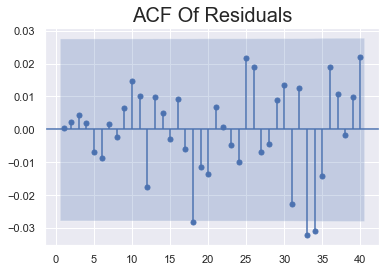

In [12]:
df['res_ar_5_ma_6'] = results_ar_5_ma_6.resid
sgt.plot_acf(df.res_ar_5_ma_6, zero = False, lags = 40)
plt.title("ACF Of Residuals",size=20)
plt.show()